In [13]:
#! /usr/bin/env python2.7
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os
#import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import glob as glob

import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

In [14]:
%matplotlib inline
import sys
# Append your Tensorflow object detection and darkflow directories to your path
#sys.path.append('PATH_TO_TENSORFLOW_OBJECT_DETECTION_FOLDER') # ~/tensorflow/models/research/object_detection
sys.path.append('/home/omkar/tensor/models/research')
#sys.path.append('PATH_TO_DARKFLOW_FOLDER') # ~/darkflow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [15]:
MODEL_NAME = 'rfcn_resnet101'

In [16]:
# Path to frozen detection graph. This is the actual model that is used for the traffic sign detection.
MODEL_PATH = os.path.join('/home/omkar/tensor/models', MODEL_NAME)
PATH_TO_CKPT = os.path.join(MODEL_PATH,'inference_graph/frozen_inference_graph.pb')

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('/home/omkar/traffic-sign-detection-master/scripts', 'gtsdb3_label_map.pbtxt')
print(PATH_TO_LABELS)
NUM_CLASSES = 3

/home/omkar/traffic-sign-detection-master/scripts/gtsdb3_label_map.pbtxt


In [17]:
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [18]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=False)
category_index = label_map_util.create_category_index(categories)
print(label_map)

item {
  name: "prohibitory"
  id: 1
}
item {
  name: "mandatory"
  id: 2
}
item {
  name: "danger"
  id: 3
}



In [19]:
def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [20]:
#PATH_TO_TEST_IMAGES_DIR = 'test_images'
image_id = 602
#def image_prediction(imgae_id):
image_to_open = '00'+str(image_id)+'.jpg'
TEST_IMAGE_PATHS = glob.glob(os.path.join('/media/omkar/extra/EC Project/dataset/FullIJCNN2013/ConvertedDataset/',str(image_to_open)))

# Size, in inches, of the output images.
IMAGE_SIZE = (20, 20)

In [21]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        for idx, image_path in enumerate(TEST_IMAGE_PATHS):
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
            # Each box represents a part of the image where a particular object was detected.
            boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
            # Each score represent how level of confidence for each of the objects.
            # Score is shown on the result image, together with the class label.
            scores = detection_graph.get_tensor_by_name('detection_scores:0')
            classes = detection_graph.get_tensor_by_name('detection_classes:0')
            num_detections = detection_graph.get_tensor_by_name('num_detections:0')
            # Actual detection.
            (box, scores, classes, num_detections) = sess.run(
                [boxes, scores, classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            #print 'boxes',np.squeeze(box)
            #print 'classes',np.squeeze(classes).astype(np.int32)
            #print 'num_detection',num_detections
            #print 'score',np.squeeze(scores)
            #print 'category_index',category_index
            # Visualization of the results of a detection.
            #max_index= np.argmax(np.squeeze(scores))
            #pred_box = np.squeeze(box)[max_index]*1000
            #print max_index
            #print pred_box
            
            '''vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(box),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            plt.figure(idx, figsize=IMAGE_SIZE)
            plt.axis('off')
            plt.imshow(image_np)'''
            
            

NameError: name 'TEST_IMAGE_PATHS' is not defined

In [ ]:
coordinates = vis_util.return_coordinates(
                        image_np,
                        np.squeeze(box),
                        np.squeeze(classes).astype(np.int32),
                        np.squeeze(scores),
                        category_index,
                        use_normalized_coordinates=True,
                        line_thickness=8,
                        min_score_thresh=0.80)
print coordinates

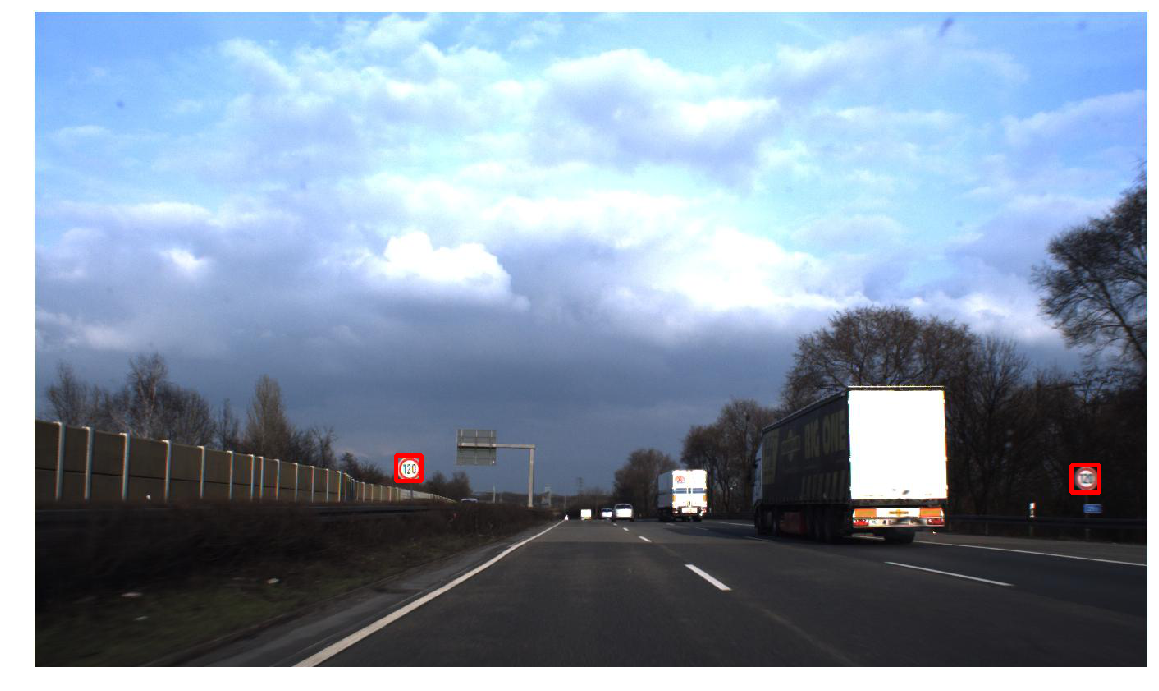

In [72]:
import cv2
for i in range(len(coordinates)):
    ymin = coordinates[i][0]
    xmin = coordinates[i][2]
    ymax = coordinates[i][1]
    xmax = coordinates[i][3]
    cv2.rectangle(image_np,(xmin,ymax),(xmax,ymin),(255,0,0),3)

plt.figure(idx, figsize=IMAGE_SIZE)
plt.axis('off')
plt.imshow(image_np)

In [88]:
f= open("/home/omkar/traffic-sign-detection-master/predictions.txt","a")

In [89]:
for i in range(len(coordinates)):
     data = str(image_id)+".jpg;"+"%d;%d;%d;%d \n" %(coordinates[i][0],coordinates[i][1],coordinates[i][2],coordinates[i][3])
     f.write(data)

In [90]:
f.close()

In [ ]:
image_id += 1